---
title: Welcome to Lasers and Optomechanics!
date: 2025-01-12
authors:
  - name: Professor Craig Cahillane
    orcid: 0000-0002-3888-314X
    affiliations:
      - Syracuse University
---

In [1]:
#| "tags": [ "hide-input",]
%matplotlib widget
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
from ipywidgets import *

plt.style.use('dark_background')

fontsize = 14
mpl.rcParams.update(
    {
        "text.usetex": False,
        "figure.figsize": (9, 6),
        "figure.autolayout": True,
        # "font.family": "serif",
        # "font.serif": "georgia",
        # 'mathtext.fontset': 'cm',
        "lines.linewidth": 1.5,
        "font.size": fontsize,
        "xtick.labelsize": fontsize,
        "ytick.labelsize": fontsize,
        "legend.fancybox": True,
        "legend.fontsize": fontsize,
        "legend.framealpha": 0.7,
        "legend.handletextpad": 0.5,
        "legend.labelspacing": 0.2,
        "legend.loc": "best",
        "axes.edgecolor": "#b0b0b0",
        "grid.color": "#707070",  # grid color"
        "xtick.color": "#b0b0b0",
        "ytick.color": "#b0b0b0",
        "savefig.dpi": 80,
        "pdf.compression": 9,
    }
)

# Interactivity

This class will make use of the interactivity of a Jupyter notebook.  
Many of the plots will feature interactive sliders or 3D plots that can be better visualized with a live kernel.

In the Jupyter Book, it is possible to launch a kernel in Binder but it takes an absolute age to load,
and when if finally does load the interactivity is very slow.

Better is to `git clone` the course content at [https://github.com/ccahilla/lasers-and-optomechanics](https://github.com/ccahilla/lasers-and-optomechanics),
create the `lasers` python environment defined in `environment.yml` via `conda` or `mamba`,
then run the Jupyter notebooks in Jupyter Lab yourself.


**I highly recommend downloading or running the Jupyter notebooks for lectures and homeworks yourself to better understand the course content.**
The syllabus has some instructions for downloading 

Also, if you make a useful demo in your homeworks or otherwise, please feel free to contribute it back to the course.

Below is an interactive sine wave plot, illustrating an interactive sine wave plot of $\sin(\omega t + \theta)$. 

interactive(children=(FloatSlider(value=1.0, description='ww', max=3.0, min=-1.0), FloatSlider(value=0.0, desc…

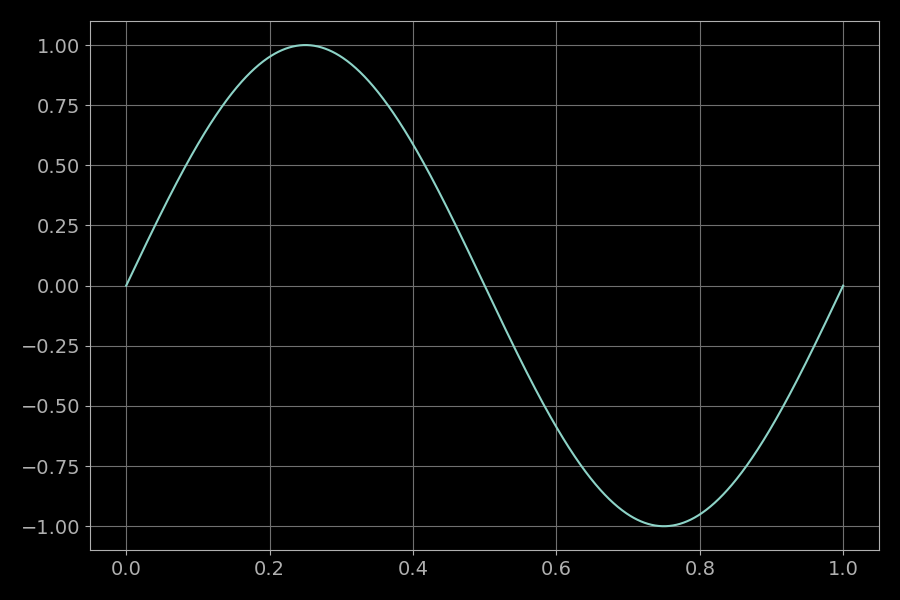

In [2]:
xx = np.linspace(0, 1, 1000)
kk = 2 * np.pi 

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(xx, np.sin(kk * xx))
ax.grid()

def update(ww = 1.0, theta = (-np.pi, np.pi)):
    line.set_ydata(np.sin(ww  * kk * xx + theta))
    fig.canvas.draw_idle()

interact(update);

# Complex Numbers Review

Here we will review complex numbers, as they will form the basis of the math in this course.  
In short, it is often convenient to express light fields as complex quantities, although all electric fields and magnetic fields associated with light must be *real-valued* in the end.
Typically, this can easily be achieved by simply taking the real part of the complex quantity.


## <span style="color:#ff4444">Complex Numbers</span>

### Cartesian Form

A *complex number* $z \in \mathbb{C}$ a single number made up of a *real* and *imaginary* component, which are totally independent of one another.
Often, the complex number $z$ is broken down into it's components like so
$$z = a + ib$$
where $z$ is the complex number,

$a$ and $b$ are real numbers,

and $i$ is the imaginary unit equal to $\sqrt{-1}$.

Another way to think about this is $a$ is the Real component of $z$, and $b$ is the Imaginary component of $z$:
$$a = \Re(z), \quad b = \Im(z)$$

### Complex Plane 

Complex numbers can be thought of as occupying a *complex plane* in the same way as the $x-y$ plane, 
with real and imaginary components described by $1$ and $i$ rather than unit vectors $\hat{x}$ and $\hat{y}$.
This is often illustrated by a vector-like plot (see the interactive plot below).
The complex plane houses all of the possible complex numbers, represented by $\mathbb{C}$, which is simply a two-dimensional real space $\mathbb{R}^2$.

### Polar Form

Another useful form for representing a complex number is *polar form*:
$$z = r e^{i \theta}$$
where $r$ represents the radial distance away from the $(0,0)$ point of the complex plane,
and $\theta$ is the counterclockwise angle the complex number makes with the x-axis.
These can be calculated from the above expressions:

\begin{align}
\label{eq:magnitude}
|z| = r = \sqrt{a^2 + b^2}
\end{align}
\begin{align}
\label{eq:argument}
\arg z = \theta = \arctan\left(\dfrac{b}{a}\right) = \arctan2(b, a)
\end{align}

$r$ is often described as the magnitude of the complex number: $r = |z|$,
while $\theta$ is the argument: $\theta = \arg(z)$.

We used $\arctan$ and $\arctan2$ functions for the argument calculations.  
The $\arctan2$ function takes in two arguments $b$ and $a$, compared to one argument for $\arctan\left(\dfrac{b}{a}\right)$. 
If $b$ and $a$ are both negative or both positive, 
$\arctan\left(\dfrac{b}{a}\right)$ will give back the same angle in the upper right quadrant.
$\arctan2$ allows one to recover information about which quadrant one is in, with positive angles $\theta \in \left[0, \dfrac{\pi}{2}\right]$ for positive $b$ and $a$, 
and negative angles $\theta \in \left[-\pi, -\dfrac{\pi}{2}\right]$ for negative $b$ and $a$.

We note here that because $\arctan$ and $\arctan2$ are used to find the angle of the complex number, 
scaling both $a$ and $b$ by any number $c$ will not impact the final result: 
$$\arctan2(cb, ca) = \arctan2(b, a)$$

### Complex Conjugate

Finally, we introduce the concept of the *complex conjugate* $z^*$ of a complex number $z$.
A complex conjugate $z^*$ is simply equal to the original complex number with its imaginary sign flipped:
$$z^* = a - i b.$$

Equivalently, in polar form, our angle is $-\theta$ instead of $\theta$:
$$z^* = r e^{-i \theta}.$$

This can all be derived by taking wherever you see the imaginary unit $i$ in an equation, and replacing it with $-i$.

### Taking the Magnitude Squared
*Taking the magnitude* of a complex number is the same as finding the length of the complex vector, using [Eq. %s](#eq:magnitude) above.

*Taking the magnitude squared* of a complex number is a very common calculation in quantum mechanics, and has an interesting relationship with complex conjugates:
\begin{align}
|z|^2 = r^2 = a^2 + b^2\\
|z|^2 = r^2 = (r e^{i \theta}) (r^{-i \theta}) = z z^*
\end{align}

In short, we can calculate the magnitude squared of a complex number by taking the product of the complex number with it's conjugate.
This is very useful, especially for superposition problems we will be dealing with.

interactive(children=(FloatSlider(value=3.0, description='$a$:', max=5.0, min=-5.0, readout_format='.3f', step…

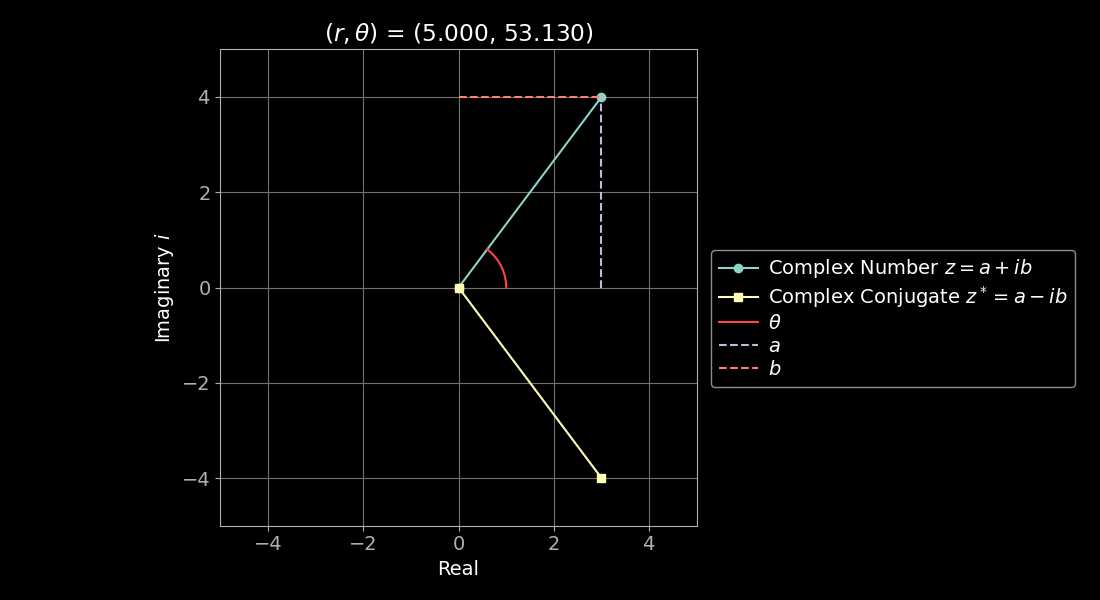

In [3]:
#| label: fig:complex_numbers
#| "tags": [ "hide-input",]
fig = plt.figure(figsize=(11,6))
ax = fig.add_subplot()

aa = 3.0
bb = 4.0
rr = np.sqrt(aa**2 + bb**2)
theta = 180/np.pi * np.arctan2(bb, aa)

thetas = np.linspace(np.pi * theta / 180, 0, 100)
xxs = np.cos(thetas)
yys = np.sin(thetas)

line1, = ax.plot([0, aa], [0, bb], 'o-', label="Complex Number $z = a + i b$")
line2, = ax.plot([0, aa], [0, -bb], 's-', label="Complex Conjugate $z^* = a - i b$")
arc1, = ax.plot(xxs, yys, color="#ff4444", label=r"$\theta$")

vline1, = ax.plot([aa, aa], [0, bb], '--', label="$a$")
hline1, = ax.plot([0, aa], [bb, bb], '--', label="$b$")

ax.set_xlabel("Real")
ax.set_ylabel("Imaginary $i$")
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.grid()

ax.set_title(r"(r, \theta) = (" + f"({rr:.3f}, {theta:.3f})")

ax.legend(bbox_to_anchor=(1.01, 0.6))
ax.set_aspect('equal')
# plt.tight_layout()

def update_complex_number(
    aa_slider_value=aa,
    bb_slider_value=bb,
):
    """
    Create waves plot with synchronized cosine and sine displays.
    """
    aa = aa_slider_value
    bb = bb_slider_value

    rr = np.sqrt(aa**2 + bb**2)
    theta = 180/np.pi * np.arctan2(bb, aa)

    newthetas = np.linspace(np.pi * theta / 180, 0, 100)
    newxxs = np.cos(newthetas)
    newyys = np.sin(newthetas)
    
    # Calculate sine
    newx1 = [0, aa]
    newy1 = [0, bb]
    newx2 = [0, aa]
    newy2 = [0, -bb]
    newvx1 = [aa, aa]
    newvy1 = [0, bb]
    newhx1 = [0, aa]
    newhy1 = [bb, bb]

    line1.set_xdata(newx1)
    line1.set_ydata(newy1)
    line2.set_xdata(newx2)
    line2.set_ydata(newy2)
    arc1.set_xdata(newxxs)
    arc1.set_ydata(newyys)

    vline1.set_xdata(newvx1)
    vline1.set_ydata(newvy1)
    hline1.set_xdata(newhx1)
    hline1.set_ydata(newhy1)

    ax.set_title(r"$(r, \theta)$ = " + f"({rr:.3f}, {theta:.3f})")
    
    fig.canvas.draw_idle()
    return

# Create interactive widget
aa_slider = FloatSlider(
    value=aa,
    min=-5,
    max=5,
    step=0.01,
    description="$a$:",
    continuous_update=True,  # Only update on release for better performance
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)
bb_slider = FloatSlider(
    value=bb,
    min=-5,
    max=5,
    step=0.01,
    description="$b$:",
    continuous_update=True,  # Only update on release for better performance
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)

interact(
    update_complex_number, 
    aa_slider_value=aa_slider, 
    bb_slider_value=bb_slider,
)
plt.show()

```{exercise}
:label: complex-numbers-exercise1

Calculate and draw a graph of the sum and difference of a complex number $z$ and it's complex conjugate $z^*$:
$$z + z^*$$ 
and
$$z - z^*$$

What are their values in Cartesian and Polar form?
```

```{solution} complex-numbers-exercise1
:label: complex-numbers-solution
:class: dropdown

I will leave the graphing up to you, make adjustments to the above code if you are feeling inspired.
From the definitions above, we have for Cartesian form
$$z + z^* = 2 a$$
and 
$$z - z^* = 2 i b$$

For Polar form, we have to remember some trig identities: $\cos\theta = \dfrac{1}{2}(e^{i \theta} + e^{-i \theta})$ and $\sin\theta = \dfrac{1}{2 i}(e^{i \theta} - e^{-i \theta})$
then 
$$z + z^* = r e^{i \theta} + r e^{-i \theta} = 2 r \cos\theta$$
and
$$z - z^* = r e^{i \theta} - r e^{-i \theta} = 2 i r \sin\theta$$
```

# <span style="color: #55ff00">Euler's Formula</span>
From the results of [](#complex-numbers-exercise1), we can start to piece together an incredibly important result in complex representation: Euler's Formula.

Euler's Formula is as follows:
\begin{align}
\label{eq:eulers_formula}
\boxed{ e^{i \theta} = \cos{\theta} - i \sin{\theta} }
\end{align}
This result can be seen geometrically from the graph above.  
The cosine of the angle $\cos\theta$ gives the x-component, which in this case is the real component.
The sine $\cos\theta$ yields the imaginary component.

Euler's Formula is an extremely convenient breakdown of the real and imaginary parts of a complex number.  
We will use this formula to represent real quantities, like positions $x$ or electric fields $\boldsymbol{E}$, as complex numbers $\tilde{x}$ or $\tilde{\boldsymbol{E}}$.

This allows us to make use of the simplified algebra for exponentials during problem solving.
At the end, we will take the real component of the complex number to recover the true position.
\begin{align}
x = \mathrm{Re}(\tilde{x})
\end{align}


# <span style="color: #ff5500">Phasors</span>

A *phasor* is typically a complex number that evolves in time:
$$z(t) = r(t) e^{i \theta(t)}$$
where $t$ is time elapsed and $r(t)$ and $\theta(t)$ are the time-dependent magnitude and argument of the phasor.

It is extremely common to describe a phasor's angle as evolving linearly with time, while the magnitude $r(t) = r_0$ is constant: 
$$\theta(t) = \omega t, r(t) = r_0$$
where $\omega$ is the angular frequency in radians / second.

The angular frequency is related to the normal frequency $\nu$ in cycles / second via
$$\omega = 2 \pi \nu$$
If we say something has a frequency of $1~\mathrm{Hz}$, we always mean it completes 1 cycle per second, so the angular frequency would be $\omega = 2 \pi (1~\mathrm{Hz})$

This gives a purely circular motion in time, as can be visualized below.


interactive(children=(FloatSlider(value=0.0, description='θ (rad):', max=6.283185307179586, readout_format='.3…

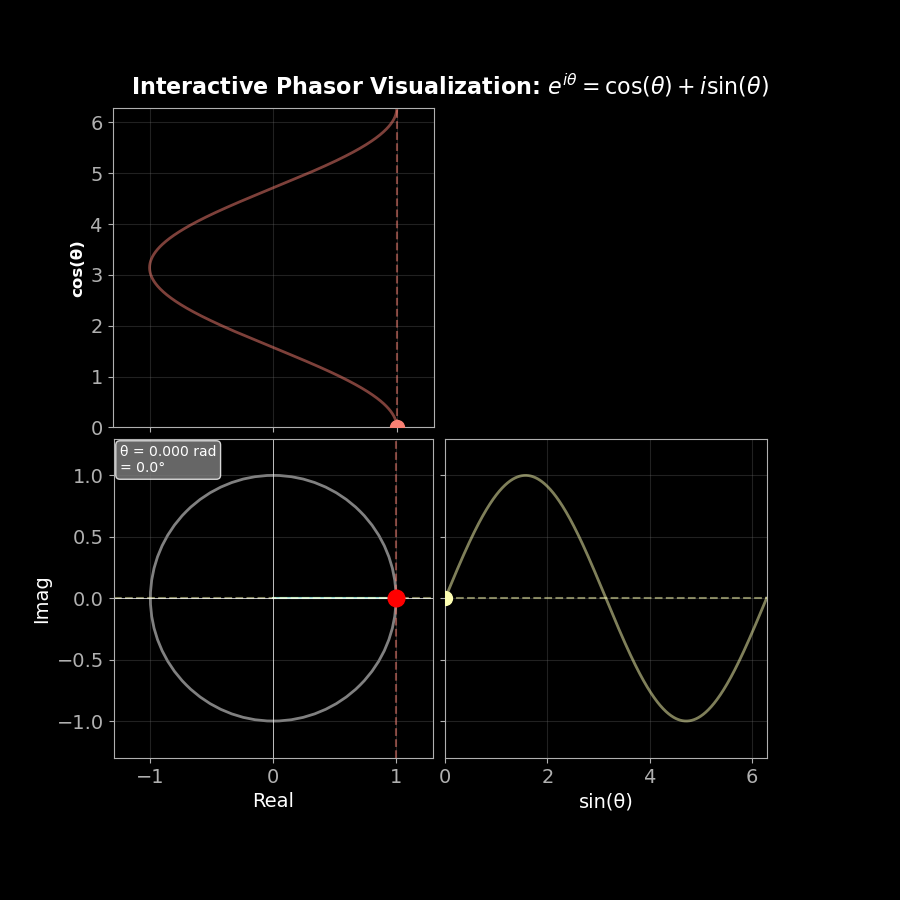

In [4]:
#| label: complex_number
#| "tags": [ "hide-input",]

# Create figure with custom layout
fig = plt.figure(figsize=(9, 9))
fig.set_tight_layout(False)
gs = fig.add_gridspec(3, 3, height_ratios=[1, 1, 0.1], width_ratios=[1, 1, 0.1],
                      hspace=0.05, wspace=0.05)

# Create subplots
ax_cos = fig.add_subplot(gs[0, 0])      # Cosine plot (top)
ax_phasor = fig.add_subplot(gs[1, 0])  # Phasor plot (center)
ax_sin = fig.add_subplot(gs[1, 1])     # Sine plot (right)

theta = 0 # initial values

cos_val = np.cos(theta)
sin_val = np.sin(theta)

# Generate full curves
theta_range = np.linspace(0, 2*np.pi, 1000)
cos_curve = np.cos(theta_range)
sin_curve = np.sin(theta_range)

# Setup cosine plot (top)
ax_cos.plot(cos_curve, theta_range, '-', color='C3', linewidth=2, alpha=0.5)
cos_dot,     = ax_cos.plot([cos_val], [theta], 'o', color='C3', markersize=10, zorder=5)
cos_val_line = ax_cos.axvline(cos_val, color='C3', linestyle='--', alpha=0.5)

ax_cos.set_xlim(-1.3, 1.3)
ax_cos.set_ylim(0, 2*np.pi)
ax_cos.set_ylabel('cos(θ)', fontsize=12, fontweight='bold')
ax_cos.grid(True, alpha=0.3)
ax_cos.axhline(0, linewidth=0.5)
ax_cos.set_xticklabels([])

# Setup phasor plot (center)
circle = plt.Circle((0, 0), 1, fill=False, color='gray', linewidth=2)
ax_phasor.add_patch(circle)

# Draw phasor arrow
# arrow = FancyArrowPatch((0, 0), (cos_val, sin_val),
#                        arrowstyle='->', mutation_scale=20, 
#                        linewidth=3, color='red', zorder=4)
# ax_phasor.add_patch(arrow)

phasor_line, = ax_phasor.plot([0,cos_val],[0,sin_val])
phasor_sin_line = ax_phasor.axhline(sin_val, color='C1', linestyle='--', alpha=0.5)
phasor_cos_line = ax_phasor.axvline(cos_val, color='C3', linestyle='--', alpha=0.5)
phasor_dot, = ax_phasor.plot([cos_val], [sin_val], 'ro', markersize=12, zorder=5)

ax_phasor.set_xlim(-1.3, 1.3)
ax_phasor.set_ylim(-1.3, 1.3)
ax_phasor.set_aspect('equal')
ax_phasor.axhline(0, linewidth=0.5)
ax_phasor.axvline(0, linewidth=0.5)
ax_phasor.set_xlabel('Real')
ax_phasor.set_ylabel('Imag')
ax_phasor.grid(True, alpha=0.3)
# ax_phasor.set_title('Phasor: $e^{i\\theta}$', fontsize=14, pad=10, fontweight='bold')

# Add text annotation
ax_phasor.text(0.02, 0.98, f'θ = {theta:.3f} rad\n= {np.degrees(theta):.1f}°',
               transform=ax_phasor.transAxes, 
               verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='grey', alpha=0.8),
               fontsize=10)

# Setup sine plot (right)
ax_sin.plot(theta_range, sin_curve, color="C1", linewidth=2, alpha=0.5)
sin_dot, = ax_sin.plot([theta], [sin_val], 'o', color="C1", markersize=10, zorder=5)
sin_val_line = ax_sin.axhline(sin_val, color='C1', linestyle='--', alpha=0.5)
ax_sin.set_xlim(0, 2*np.pi)
ax_sin.set_ylim(-1.3, 1.3)
ax_sin.set_xlabel('sin(θ)')
# ax_sin.set_yticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
ax_sin.set_yticklabels([])
ax_sin.grid(True, alpha=0.3)
ax_sin.axvline(0, color='k', linewidth=0.5)

plt.suptitle('Interactive Phasor Visualization: $e^{i\\theta} = \\cos(\\theta) + i\\sin(\\theta)$', 
             fontsize=16, y=0.92, fontweight='bold')

# plt.tight_layout()
# plt.show()

def update_phasor(theta_slider_value=1):
    """
    Create phasor plot with synchronized cosine and sine displays.
    
    Parameters:
    -----------
    theta : float
        Angle in radians (0 to 2π)
    """
    theta = theta_slider_value
    
    # Calculate phasor components
    cos_val = np.cos(theta)
    sin_val = np.sin(theta)

    cos_dot.set_xdata([cos_val])
    cos_dot.set_ydata([theta])
    cos_val_line.set_xdata([cos_val,cos_val])

    phasor_line.set_xdata([0,cos_val])
    phasor_line.set_ydata([0,sin_val])
    phasor_sin_line.set_ydata([sin_val, sin_val])
    phasor_cos_line.set_xdata([cos_val, cos_val])
    phasor_dot.set_xdata([cos_val])
    phasor_dot.set_ydata([sin_val])

    sin_dot.set_xdata([theta])
    sin_dot.set_ydata([sin_val])
    sin_val_line.set_ydata([sin_val,sin_val])

    # fig.canvas.draw()
    # fig.canvas.flush_events()
    fig.canvas.draw_idle()
    return

# Create interactive widget
theta_slider = FloatSlider(
    value=0,
    min=0,
    max=2*np.pi,
    step=0.01,
    description='θ (rad):',
    continuous_update=True,  # Only update on release for better performance
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)

interact(update_phasor, theta_slider_value=theta_slider)
plt.show()

```{exercise}
:label: complex-ii

Using Euler's formula, calculate $i^i$.
```

```{solution} complex-ii
:label: complex-ii-solution
:class: dropdown

First, we express $i$ in terms of an exponential.
Starting with 
\begin{align}
e^{i \theta} = \cos(\theta) + i \sin(\theta)
\end{align}
we see that we get a purely imaginary expression when $\theta = \dfrac{\pi}{2}$.
This gives us $i = \exp\left({i \dfrac{\pi}{2}}\right)$

Now, $i^i$ can be rewritten as 
$$i^i = \left(e^{i \frac{\pi}{2}}\right)^i = e^{i \frac{\pi}{2} \cdot i } = e^{-\frac{\pi}{2} }$$
which happens to be an entirely real number.
```

```{exercise}
:label: sine-cosine

Using Euler's formula, derive the sine and cosine trig sum expressions: $\sin(A + B)$ and $\cos(A + B)$.
```

```{solution} sine-cosine
:label: sine-cosine-solution
:class: dropdown

First, look at $e^{i (A + B)}$
\begin{align}
\label{eq:exp_sum}
e^{i (A + B)} = \cos(A + B) + i \sin(A + B)
\end{align}

Then separate it into to exponentials:
\begin{align}
e^{i (A + B)} &= e^{i A} e^{i B} \\
&= \Big[\cos(A) + i \sin(A)\Big]\Big[\cos(B) + i \sin(B)\Big] \\
&= \Big[\cos(A) \cos(B) - \sin(A) \sin(B)\Big] + i \Big[ \cos(A) \sin(B) + \cos(B) \sin(A)\Big]
\end{align}

Matching coefficients from [](#eq:exp_sum) gives
\begin{align}
\cos(A + B) &= \cos(A) \cos(B) - \sin(A) \sin(B) \\
\sin(A + B) &= \cos(A) \sin(B) + \cos(B) \sin(A)
\end{align}
```

# <span style="color: #ff5500">Sum of two complex numbers</span>

In the last example we looked at the sum of a complex number with it's own complex conjugate, 
and found it was always a real number.

For two arbitrary complex numbers $u, v$, this is not always the case.

Because it will be useful going forward when we discuss superposition and interference, 
we state some properties of sums of complex numbers.

### Cartesian Sum
This one is straightforward, because of the independence of real and imaginary components:
\begin{align}
u &= a + i b\\
v &= c + i d\\
u + v &= (a + c) + i (b + d)
\end{align}

### Polar Sum
This one is less straightforward or immediately useful, but we tend to describe electric fields in polar form, so it is helpful to have this in mind
\begin{align}
u &= r_1 e^{i \theta_1}\\
v &= r_2 e^{i \theta_2}\\
u + v &= r_1 e^{i \theta_1} + r_2 e^{i \theta_2}\\
u + v &= r_1 (\cos\theta_1 + i \sin\theta_1) + r_2 (\cos\theta_2 + i \sin\theta_2)\\
u + v &= r_1 \cos\theta_1 + r_2 \cos\theta_2 + i ( r_1 \sin\theta_1 + r_2 \sin\theta_2 )
\end{align}



# <span style="color: #ff5500">Product of two complex numbers</span>

Here we calculate the product of two complex number $u, v$:

#### Cartesian Product
\begin{align}
u &= a + i b\\
v &= c + i d\\
u v &= (a + i b)(c + id)\\
u v &= (ac - bd) + i (bc + ad)
\end{align}

#### Polar Product
\begin{align}
u &= r_1 e^{i \theta_1}\\
v &= r_2 e^{i \theta_2}\\
u v &= r_1 r_2 e^{i (\theta_1 + \theta_2)} 
\end{align}

Here we find that multiplying two complex numbers in polar coordinates is far easier than in cartesian coordinates. 
Additionally, we see a major advantage of multiplication of complex numbers directly from the above:
**Multiplication of complex numbers corresponds directly to rotations in 2D**


# <span style="color: #5555ff">Plotting Complex Functions</span>

Suppose I have a complex function $z(\phi)$ on the domain $\phi \in [0,2\pi]$:
\begin{align}
z(\phi) = e^{i \phi} + 3 e^{-i \phi}
\end{align}

**Question:** Find the magnitude $r(\phi)$ and argument $\theta(\phi)$ of $z(\phi)$.

The magnitude is straightforward, recalling $r = |z|$
\begin{align}
\label{eq:random_mag}
r^2(\phi) &= |z(\phi)|^2 = z(\phi) z^*(\phi)\\
r^2(\phi) &= \left( e^{i \phi} + 3 e^{-i \phi} \right) \left( e^{-i \phi} + 3 e^{i \phi} \right)\\
r^2(\phi) &= 1 + 9 + 3 (e^{i 2 \phi} + e^{-i 2 \phi})\\
r^2(\phi) &= 10 + 6 \cos(2\phi)\\
r(\phi) &= \sqrt{10 + 6 \cos(2\phi)}
\end{align}

For the argument $\theta(\phi)$, there is no nice expression.
First we note the real and imaginary parts of $z$:
\begin{align}
\mathrm{Re}(z) &= 4 \cos(\phi)\\
\mathrm{Im}(z) &= 2 \sin(\phi)
\end{align}

\begin{align}
\label{eq:random_arg}
\theta(\phi) &= \arctan2\left(\mathrm{Im}(z), \mathrm{Re}(z) \right)\\
\theta(\phi) &= \arctan2\left(2 \sin(\phi), 4 \cos(\phi) \right)
\end{align}
Here I've used $\arctan2(y,x)$, which is a common two-argument function to maintain quadrant information.
In the normal $\arctan\left(\dfrac{y}{z}\right)$ function, if x and y are both negative or both positive, you can't tell if you are in Quandrant I or III.


## Discussion
We briefly discuss our results from Eqs. [](#eq:random_mag) and [](#eq:random_arg).
In the above, $\phi$ serves as a independent, parametric variable controlling $z$.
The magnitude and phase $r(\phi), \theta(\phi)$ of $z$ depend on $\phi$.

I want to emphasize that $\phi \neq \theta$ in the general case.  
Our first plot below emphasizes this.

In [5]:
def zzs(phis, aa=4, bb=2, r0=0, rotation=0):
    """Arbitrary ellipse equation, with center on real axis at r0 and rotation by rotation radians.
    aa is real axis of ellipse (with no rotation)
    bb is the imaginary axis of ellipse (with no rotation),
    r0 is the displacement along the real axis of the center,
    rotation is the angle the entire ellipse is rotated"""
    return ((aa * np.cos(phis) - r0) + 1j * bb * np.sin(phis)) * np.exp(1j * rotation)

def dzzdphis(phis, aa=4, bb=2, r0=0, rotation=0):
    """Derivative of arbitrary ellipse equation  with respect to phi.
    aa is real axis of ellipse (with no rotation)
    bb is the imaginary axis of ellipse (with no rotation),
    r0 is the displacement along the real axis of the center,
    rotation is the angle the entire ellipse is rotated"""
    return ( -aa * np.sin(phis) + 1j * bb * np.cos(phis) ) * np.exp(1j * rotation)

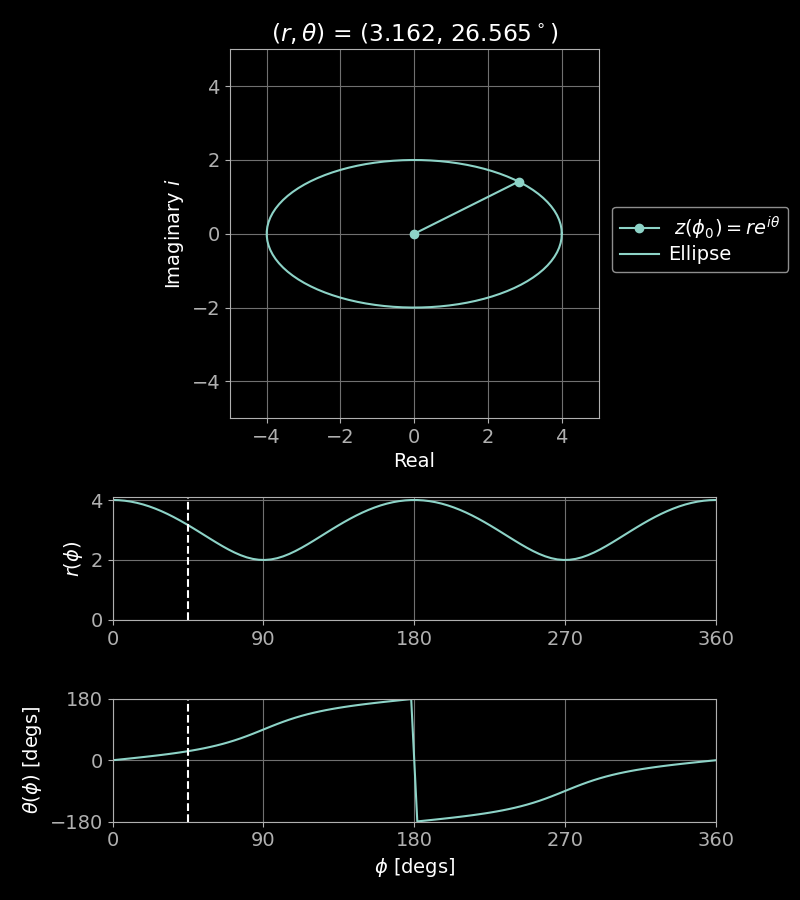

In [6]:
#| label: fig:polar_complex_functions
#| "tags": [ "hide-input",]
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(8,9), gridspec_kw={'height_ratios': [3, 1, 1]})

phis = np.linspace(0, 2 * np.pi, 100)

aa = 4.0
bb = 2.0
r0 = 0.0
rotation = 0.0
phi0 = np.pi/4

plot_zzs = zzs(phis, aa, bb, r0, rotation)
plot_xxs = np.real(plot_zzs)
plot_yys = np.imag(plot_zzs)
plot_rrs = np.abs(plot_zzs)
plot_thetas = 180/np.pi * np.angle(plot_zzs)

plot_zz0 = zzs(phi0, aa, bb, r0, rotation)
plot_xx0 = np.real(plot_zz0)
plot_yy0 = np.imag(plot_zz0)
plot_rr0 = np.abs(plot_zz0)
plot_theta0 = 180/np.pi * np.angle(plot_zz0)

ax1.plot([0, plot_xx0], [0, plot_yy0], 'o-', label=r" $z(\phi_0) = r e^{i \theta}$")
ax1.plot(plot_xxs, plot_yys, color=line1.get_color(), label="Ellipse")
ax2.plot(180/np.pi * phis, plot_rrs, label=r"$r$")
ax2.axvline(x=180/np.pi * phi0, ls="--", label=r"\phi_0")
ax3.plot(180/np.pi * phis, plot_thetas, label=r"$\theta$")
ax3.axvline(x=180/np.pi * phi0, ls="--", label=r"\phi_0")

ax1.set_xlabel("Real")
ax1.set_ylabel("Imaginary $i$")
ax2.set_ylabel(r"$r(\phi)$")
ax3.set_xlabel(r"$\phi$ [degs]")
ax3.set_ylabel(r"$\theta(\phi)$ [degs]")

ax1.set_xlim([-5, 5])
ax1.set_ylim([-5, 5])
ax1.grid()
ax2.set_xlim([0, 360])
ax2.set_ylim(bottom=0)
ax2.grid()
ax2.set_xticks([0,90,180,270,360])
ax3.set_xlim([0, 360])
ax3.set_ylim([-180, 180])
ax3.grid()
ax3.set_xticks([0,90,180,270,360])
ax3.set_yticks([-180,0,180])

ax1.set_title(r"$(r, \theta)$ = " + f"({plot_rr0:.3f}, {plot_theta0:.3f}"+r"$^\circ$)")

ax1.legend(bbox_to_anchor=(1.01, 0.6))
ax1.set_aspect('equal')


interactive(children=(FloatSlider(value=4.0, description='$a$:', max=5.0, min=-5.0, readout_format='.3f', step…

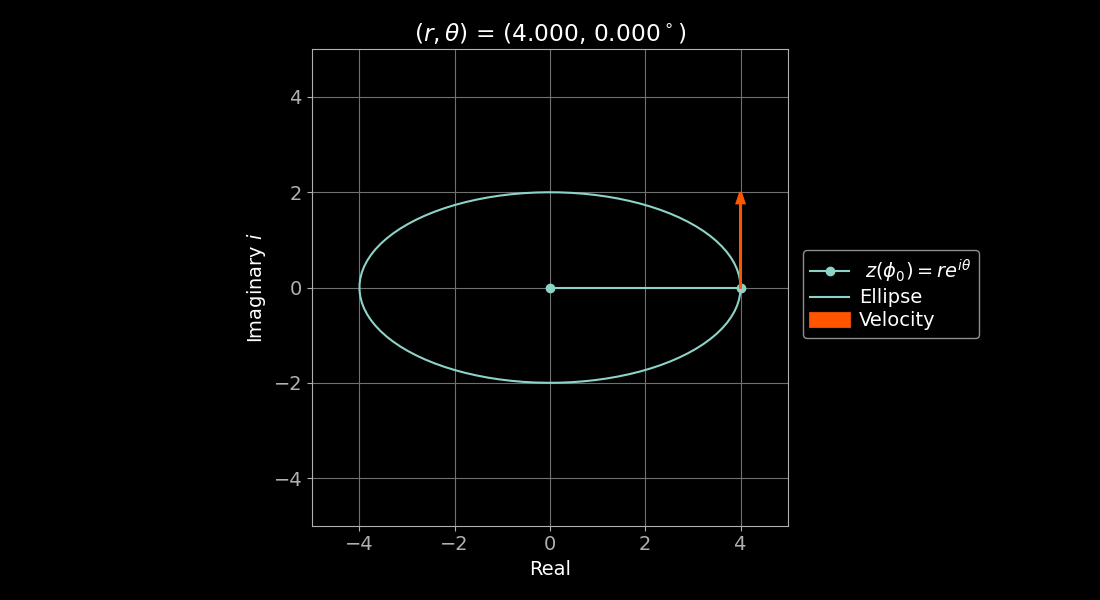

In [7]:
#| label: fig:interactive_ellipse
#| "tags": [ "hide-input",]
fig = plt.figure(figsize=(11,6))
ax = fig.add_subplot()

phis = np.linspace(0, 2 * np.pi, 100)

aa = 4.0
bb = 2.0
r0 = 0.0
rotation = 0.0
phi0 = 0

plot_zzs = zzs(phis, aa, bb, r0, rotation)
plot_xxs = np.real(plot_zzs)
plot_yys = np.imag(plot_zzs)

plot_zz0 = zzs(phi0, aa, bb, r0, rotation)
plot_rr0 = np.abs(plot_zz0)
plot_theta0 = np.angle(plot_zz0)
plot_xx0 = np.real(plot_zz0)
plot_yy0 = np.imag(plot_zz0)

plot_dz0 = dzzdphis(phi0, aa, bb, r0, rotation)
plot_dx0 = np.real(plot_dz0)
plot_dy0 = np.imag(plot_dz0)


line1, = ax.plot([0, plot_xx0], [0, plot_yy0], 'o-', label=r" $z(\phi_0) = r e^{i \theta}$")
arc1, = ax.plot(plot_xxs, plot_yys, color=line1.get_color(), label="Ellipse")

arrow1 = ax.arrow(plot_xx0, plot_yy0, plot_dx0, plot_dy0, shape='full', color="#ff5500", lw=2, length_includes_head=True, head_width=.15, zorder=2, label="Velocity")

ax.set_xlabel("Real")
ax.set_ylabel("Imaginary $i$")
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.grid()

ax.set_title(r"$(r, \theta)$ = " + f"({plot_rr0:.3f}, {180/np.pi*plot_theta0:.3f})")

ax.legend(bbox_to_anchor=(1.01, 0.6))
ax.set_aspect('equal')
# plt.tight_layout()

def update_complex_function(
    aa_slider_value=aa,
    bb_slider_value=bb,
    r0_slider_value=r0,
    rotation_slider_value=rotation,
    phi0_slider_value=phi0
):
    """
    Create waves plot with synchronized cosine and sine displays.
    """
    new_aa = aa_slider_value
    new_bb = bb_slider_value
    new_r0 = r0_slider_value
    new_rotation = rotation_slider_value
    new_phi0 = phi0_slider_value
    
    new_plot_zzs = zzs(phis, new_aa, new_bb, new_r0, new_rotation)
    new_plot_xxs = np.real(new_plot_zzs)
    new_plot_yys = np.imag(new_plot_zzs)
    
    new_plot_zz0 = zzs(new_phi0, new_aa, new_bb, new_r0, new_rotation)
    new_plot_rr0 = np.abs(new_plot_zz0)
    new_plot_theta0 = np.angle(new_plot_zz0)
    new_plot_xx0 = np.real(new_plot_zz0)
    new_plot_yy0 = np.imag(new_plot_zz0)

    new_plot_dz0 = dzzdphis(new_phi0, aa, bb, r0, rotation)
    new_plot_dx0 = np.real(new_plot_dz0)
    new_plot_dy0 = np.imag(new_plot_dz0)
    
    new_xx0 = [0, new_plot_xx0]
    new_yy0 = [0, new_plot_yy0]
    new_xxs = new_plot_xxs
    new_yys = new_plot_yys

    line1.set_xdata(new_xx0)
    line1.set_ydata(new_yy0)
    arc1.set_xdata(new_xxs)
    arc1.set_ydata(new_yys)
    arrow1.set_data(x=new_plot_xx0, y=new_plot_yy0, dx=new_plot_dx0, dy=new_plot_dy0)

    ax.set_title(r"$(r, \theta)$ = " + f"({new_plot_rr0:.3f}, {180/np.pi*new_plot_theta0:.3f}"+r"$^\circ$)")
    
    fig.canvas.draw_idle()
    return

# Create interactive widget
aa_slider = FloatSlider(
    value=aa,
    min=-5,
    max=5,
    step=0.01,
    description="$a$:",
    continuous_update=True,  # Only update on release for better performance
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)
bb_slider = FloatSlider(
    value=bb,
    min=-5,
    max=5,
    step=0.01,
    description="$b$:",
    continuous_update=True,  # Only update on release for better performance
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)
r0_slider = FloatSlider(
    value=r0,
    min=-2,
    max=2,
    step=0.01,
    description="$r_0$:",
    continuous_update=True,  # Only update on release for better performance
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)
rotation_slider = FloatSlider(
    value=rotation,
    min=0,
    max=2*np.pi,
    step=0.01,
    description=r"$\theta_0$:",
    continuous_update=True,  # Only update on release for better performance
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)
phi0_slider = FloatSlider(
    value=phi0,
    min=0,
    max=2*np.pi,
    step=0.01,
    description=r"$\phi_0$:",
    continuous_update=True,  # Only update on release for better performance
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)

interact(
    update_complex_function, 
    aa_slider_value=aa_slider, 
    bb_slider_value=bb_slider,
    r0_slider_value=r0_slider, 
    rotation_slider_value=rotation_slider,
    phi0_slider_value=phi0_slider,
)
plt.show()

# <span style="color: #55ff55">Complex Time Derivatives</span>

Suppose we have a general phasor $z(t) = r(t) e^{i \theta(t)}$.  

Let's calculate the generalized velocity $\dfrac{dz}{dt} = \dot{z}$ in both cartesian and polar coordinates

## Cartesian
This one is very straightforward, because the real and imaginary components $x, y$ do not interact:
\begin{align}
\dfrac{dz}{dt} &= \dfrac{dx}{dt} + i \dfrac{dy}{dt}\\
\dot{z} &= \dot{x} + i \dot{y}
\end{align}
This separates the velocity into two entirely separate and general 1D velocities.  
However, this may not always be the best choice.

## Polar
In polar coordinates, $r(t)$ and $\theta(t)$ are no longer entirely independent: a change in $\theta$ will result in different arc lengths depending on $r$.
If we take the time-derivative $\dot{z}$:
\begin{align}
\label{eq:dot_z}
\dot{z} = \dot{r} e^{i \theta} + i \dot{\theta} r e^{i \theta}
\end{align}
Analyzing this velocity for a moment, we see that a change in the magnitude $\dot{r}$ occurs rotated by the argument $\theta$.
Additionally, the change in the phase $\dot{\theta}$ is also rotated by the argument $\theta$, and also scaled by the magnitude $r$.
In fact, there is a convenient way of expressing these scalings, found by dividing by the original number $z = r e^{i \theta}$:
\begin{align}
\boxed{ \dfrac{\dot{z}}{z} = \dfrac{\dot{r}}{r} + i \dot{\theta} }
\end{align}
This normalized velocity $\dfrac{\dot{z}}{z}$ gives a convenient expression in the real and imaginary parts.
The real part $\dfrac{\dot{r}}{r}$ is only the normalized radial velocity, 
while the imaginary part $\dot{\theta}$ is only the angular velocity.
By normalizing by $z$, we are able to pick off the polar velocity terms by taking the real and imaginary components.

```{exercise}
:label: complex-time-derivative


Calculate the normalized second-order time derivative $\dfrac{\ddot{z}}{z}$ in cartesian and polar coordinates.
```

```{solution} complex-time-derivative
:label: complex-time-derivatives-solution
:class: dropdown

The cartesian solution is very simple:
\begin{align}
\ddot{z} = \ddot{x} + i \ddot{y}
\end{align}
then $\dfrac{\ddot{z}}{z}$ becomes
\begin{align}
\dfrac{\ddot{z}}{z} = \dfrac{ \ddot{x} + i \ddot{y} }{x + i y}
\end{align}
and there are no further good simplifications.  (One could multiple both top and bottom by $x - i y$, but it doesn't help much.)

In polar coordinates, the solution is much more complex.
Starting with Eq. [](#eq:dot_z):
\begin{align}
\dfrac{d}{dt} \dot{z} &= \dfrac{d}{dt} \left( \dot{r} e^{i \theta} + i \dot{\theta} r e^{i \theta} \right) \\~\\
\ddot{z} &= \ddot{r} e^{i \theta} + \underbrace{ i \dot{\theta} \dot{r} e^{i \theta} } + i \ddot{\theta} r e^{i \theta} + \underbrace{ i \dot{\theta} \dot{r} e^{i \theta} } - r \dot{\theta}^2 e^{i \theta}\\~\\
\ddot{z} &= \ddot{r} e^{i \theta} - r \dot{\theta}^2 e^{i \theta} + i ( \ddot{\theta} r e^{i \theta} + 2 \dot{\theta} \dot{r} e^{i \theta} )
\end{align}

Dividing again by $z$:
\begin{align}
 \boxed{\dfrac{\ddot{z}}{z} = \left[ \dfrac{\ddot{r}}{r} - \dot{\theta}^2 \right] + i \left[ \ddot{\theta} + \dfrac{2 \dot{\theta} \dot{r}}{r} \right]}
\end{align}
Each of these terms can be understood in terms of physics concepts we're familiar with.

$\dfrac{\ddot{r}}{r}$ is the raw radial acceleration term,

$\dot{\theta}^2$ is the angular velocity squared term associated with centripetal motion,

$\ddot{\theta}$ is the raw angular acceleration term,

$\dfrac{2 \dot{\theta} \dot{r}}{r}$ is product of the radial and angular velocity, 
which is sort of akin to *angular momentum* and accounts for how if radial and angular velocity are constant and nonzero, then we *must* have some acceleration in the angular direction to account for this.
Think of a spiral into the origin, how the acceleration of such a path must appear.
Question 3E on your homework explores such a path.
```

# <span style="color: #ffc0cb">Fourier Transforms</span>
Phasors offer a very convenient way of breaking down evolutions in time in terms of frequency $\omega$.
In fact, they form the backbone of the infamous *Fourier Transform*.  
If I have a real function signal $x(t)$ (say $x(t)$ represents the position of a mass on a pendulum), I can break down the mass's position in terms of its frequency components by multiplying by a phasor $e^{-i \omega t}$, then integrating over the entire signal time:
\begin{align}
\label{eq:fourier_transform}
X(\omega) = \dfrac{1}{\sqrt{2 \pi}}\displaystyle\int_{-\infty}^{\infty} x(t) e^{-i \omega t} dt
\end{align}
The resulting complex quantity $X(\omega)$ is a representation of the mass's position in the *frequency domain* $\omega \in \mathbb{R}$.

If a mass is moving sinusoidally at $\nu = 1~\mathrm{Hz}$, then this function "picks out" that motion and returns its amplitude and phase.

```{exercise}
:label: fourier-transform-exercise1

If we have a position function $x(t)$ with constant angular frequency $\omega_0$:
$$x(t) = A \sin(\omega_0 t + \phi),$$
perform the Fourier Transform [Equation %s](#eq:fourier_transform) and calculate $X(\omega)$.

*Hint: Use the exponential breakdown of a sine wave*
```

```{solution} fourier-transform-exercise1
:label: fourier-transform-exercise1-solution
:class: dropdown

First, express $x(t)$ as an exponential:
$$x(t) = A \sin(\omega_0 t + \phi) = \dfrac{A}{2 i} (e^{i(\omega_0 t + \phi)} - e^{-i(\omega_0 t + \phi)})$$

Then we'll get two distinct integrals:
\begin{align}
X(\omega) &= \dfrac{1}{\sqrt{2 \pi}} \displaystyle\int_{-\infty}^{\infty} A \sin(\omega_0 t + \phi) e^{-i \omega t} dt \\
X(\omega) &= \dfrac{1}{\sqrt{2 \pi}} \displaystyle\int_{-\infty}^{\infty} \left( \dfrac{A}{2 i} (e^{i(\omega_0 t + \phi)} - e^{-i(\omega_0 t + \phi)}) \right) e^{-i \omega t} dt\\
X(\omega) &= \dfrac{A}{2 i \sqrt{2 \pi}} \left( \displaystyle\int_{-\infty}^{\infty} e^{i(\omega_0 t + \phi)} e^{-i \omega t} dt - \displaystyle\int_{-\infty}^{\infty} e^{-i(\omega_0 t + \phi)} e^{-i \omega t} dt \right)\\
X(\omega) &= \dfrac{A}{2 i \sqrt{2 \pi}} \left( \displaystyle\int_{-\infty}^{\infty} e^{i(\omega_0 - \omega) t} e^{i \phi} dt - \displaystyle\int_{-\infty}^{\infty} e^{-i(\omega_0 + \omega) t)} e^{-i \phi} dt \right)\\
X(\omega) &= \dfrac{A}{2 i \sqrt{2 \pi}} \left( e^{i \phi} \displaystyle\int_{-\infty}^{\infty} e^{i(\omega_0 - \omega) t} dt - e^{-i \phi} \displaystyle\int_{-\infty}^{\infty} e^{-i(\omega_0 + \omega) t)}  dt \right)
\end{align}

At this point, we have two distinct integrals over infinite time for a complex exponential $e^{i(\omega_0 - \omega) t}$ and $e^{-i(\omega_0 + \omega) t)}$.
These are just phasors, like we looked at before, that oscillate around zero infinitely.  
They should integrate to exactly zero over infinite time.

There is only one possible value where *no* oscillations happen: when $\omega = +\omega_0$ for the left integral, or $\omega = -\omega_0$ for the right integral.
The integral over the exponentials yield Dirac delta functions at those frequencies: 
they evaluate to $2 \pi \delta(\omega - \omega_0)$ and $2 \pi \delta(\omega + \omega_0)$.

Plugging into our results above yields
\begin{align}
X(\omega) &= \dfrac{A}{2 i \sqrt{2 \pi}} \left( e^{i \phi} (2 \pi \delta(\omega - \omega_0)) - e^{-i \phi} (2 \pi \delta(\omega + \omega_0)) \right)\\
X(\omega) &= -i A \sqrt{\dfrac{\pi}{2}} \left( e^{i \phi} \delta(\omega - \omega_0) - e^{-i \phi} \delta(\omega + \omega_0) \right)
\end{align}

So we get a Fourier Transform result with two Dirac delta peaks located at only $\omega = \pm \omega_0$, 
with amplitude $A \sqrt{\dfrac{\pi}{2}}$ and phases $-i e^{i \phi}$ and $i e^{-i \phi}$
```